In [2]:
"""
1. Leer un archivo CSV de gran tamaño en fragmentos
Para esto se uso el data set del titanic, que se puede descargar de:
https://github.com/awesomedata/awesome-public-datasets/blob/master/Datasets/titanic.csv.zip
Este nos proporciona un .csv el cual lo copiamos en nuestra carpeta
"""
import pandas as pd
chunksize = 250  # Número de filas por fragmento
# Leer el archivo CSV en fragmentos
for chunk in pd.read_csv('titanic.csv', chunksize=chunksize):
    print(f"Procesando fragmento con {len(chunk)} filas")

Procesando fragmento con 250 filas
Procesando fragmento con 250 filas
Procesando fragmento con 250 filas
Procesando fragmento con 141 filas


In [5]:
"""
2. Contar la frecuencia de palabras en un texto muy grande
Para esto se uso el data set de la novela
"Don Quijote de la Mancha", que se puede descargar de:
https://www.gutenberg.org/files/2000/2000-0.txt
"""
from collections import Counter
def contar_frecuencia_palabras(archivo):
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
    palabras = texto.split()
    contador = Counter(palabras)
    return contador

archivo = 'texto.txt'
frecuencia_palabras = contar_frecuencia_palabras(archivo)
# Imprimir las 10 palabras más comunes
print(frecuencia_palabras.most_common(10))

[('que', 19546), ('de', 18134), ('y', 15976), ('la', 10329), ('a', 9627), ('el', 8009), ('en', 7941), ('no', 5622), ('se', 4751), ('los', 4701)]


In [31]:
"""
3. Convertir datos JSON a DataFrame
Para esto se uso el data set de la API de Pokemon, que se puede descargar de:
https://pokeapi.co/api/v2/pokemon?limit=1000
"""
import json
with open('monedas.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,amount,base,start_date,end_date,rates
2019-12-31,1.0,USD,2019-12-31,2025-05-27,"{'AUD': 1.4238, 'BGN': 1.741, 'BRL': 4.0197, '..."
2020-01-02,1.0,USD,2019-12-31,2025-05-27,"{'AUD': 1.43, 'BGN': 1.7473, 'BRL': 4.0088, 'C..."
2020-01-03,1.0,USD,2019-12-31,2025-05-27,"{'AUD': 1.4381, 'BGN': 1.7546, 'BRL': 4.0613, ..."
2020-01-06,1.0,USD,2019-12-31,2025-05-27,"{'AUD': 1.44, 'BGN': 1.7472, 'BRL': 4.0612, 'C..."
2020-01-07,1.0,USD,2019-12-31,2025-05-27,"{'AUD': 1.4546, 'BGN': 1.7506, 'BRL': 4.0839, ..."


In [32]:
df.drop(columns=['amount', 'start_date', 'end_date'], inplace=True)
df = df.reset_index()
df = df.rename(columns={'index': 'Fecha'})
df.head()

,Fecha,base,rates
0,2019-12-31,USD,"{'AUD': 1.4238, 'BGN': 1.741, 'BRL': 4.0197, '..."
1,2020-01-02,USD,"{'AUD': 1.43, 'BGN': 1.7473, 'BRL': 4.0088, 'C..."
2,2020-01-03,USD,"{'AUD': 1.4381, 'BGN': 1.7546, 'BRL': 4.0613, ..."
3,2020-01-06,USD,"{'AUD': 1.44, 'BGN': 1.7472, 'BRL': 4.0612, 'C..."
4,2020-01-07,USD,"{'AUD': 1.4546, 'BGN': 1.7506, 'BRL': 4.0839, ..."


In [34]:
rates_df = df["rates"].apply(pd.Series)
df = pd.concat([df, rates_df], axis=1)
df.drop(columns=['rates'], inplace=True)
df.head()

,Fecha,base,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,...,NZD,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,ZAR
0,2019-12-31,USD,1.4238,1.7410,4.0197,1.2994,0.96617,6.9615,22.617,6.6508,...,1.4824,50.650,3.7892,4.2576,62.272,9.2993,1.3451,29.745,5.9501,14.0442
1,2020-01-02,USD,1.4300,1.7473,4.0088,1.2998,0.97070,6.9638,22.703,6.6755,...,1.4936,50.768,3.8009,4.2730,61.815,9.3566,1.3476,30.145,5.9590,14.0709
2,2020-01-03,USD,1.4381,1.7546,4.0613,1.2982,0.97246,6.9716,22.751,6.7041,...,1.4998,51.120,3.8121,4.2867,62.007,9.4068,1.3499,30.155,5.9735,14.2838
3,2020-01-06,USD,1.4400,1.7472,4.0612,1.2976,0.96927,6.9724,22.602,6.6761,...,1.4997,51.141,3.7891,4.2651,62.002,9.4075,1.3498,30.145,5.9764,14.2456
4,2020-01-07,USD,1.4546,1.7506,4.0839,1.2997,0.97118,6.9425,22.624,6.6891,...,1.5067,50.870,3.8003,4.2766,61.992,9.4364,1.3499,30.275,5.9757,14.2968


In [36]:
"""
4. Filtrar datos en un DataFrame grande
"""
df_csv = pd.read_csv('titanic.csv')
df_filtred = df_csv[df_csv['Survived'] == 1]
df_filtred.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
"""
5. Agrupar y resumir datos (GroupBy)
"""
df_grouped = df_csv.groupby(['Sex', "Pclass"]).agg({'Survived': 'mean'})
df_grouped.head()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407

In [43]:
"""
6. Usar compresion al guardar un archivo grane
"""
df_csv.to_csv('titanic_comprimido.csv.gz', compression='gzip', index=False)

In [ ]:
"""
7. Leer multiples archivos CSV y combinarlos
"""
df_partido1 = df_csv.iloc[:, :3]
df_partido2 = df_csv.iloc[:, 3:6]
df_partido3 = df_csv.iloc[:, 6:]
df_partido1.to_csv('partido1.csv', index=False)
df_partido2.to_csv('partido2.csv', index=False)
df_partido3.to_csv('partido3.csv', index=False)

import glob

#Se usara el dataset de los titanic, pero en diferentes archivos
files = glob.glob('partido*.csv')
df_multiples = pd.concat([pd.read_csv(file) for file in files], axis=1)
df_multiples.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
"""
8. Eliminar duplicado en un dataset
"""
df_sin_duplicados = pd.read_csv('titanic.csv').drop_duplicates()
print(df_sin_duplicados.shape)

(891, 12)


In [56]:
"""
9. Normalizar columnas numericas
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fare_escalado = scaler.fit_transform(df_csv[['Fare']])
df_csv["Fare"]= fare_escalado
df_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,NaN,S


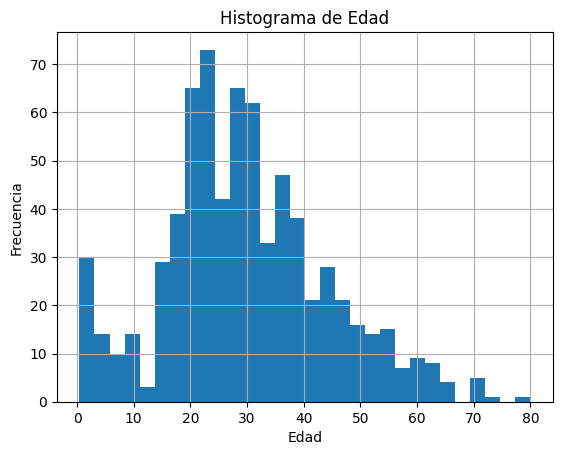

In [64]:
"""
10. Crear un histograma de una columna grande
"""
import matplotlib.pyplot as plt
df_csv['Age'].hist(bins=30)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()